In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

# Holt-Winters

In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

--2024-09-22 21:57:43--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv.4’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.02s   

2024-09-22 21:57:43 (2.99 MB/s) - ‘daily-min-temperatures.csv.4’ saved [67921/67921]



<Axes: xlabel='Date'>

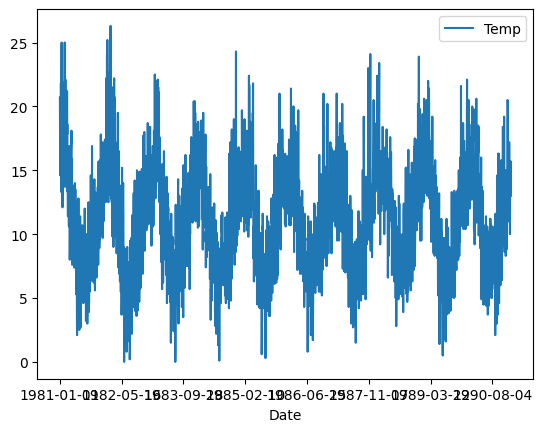

In [3]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
df_temperatures = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
df_temperatures.plot()

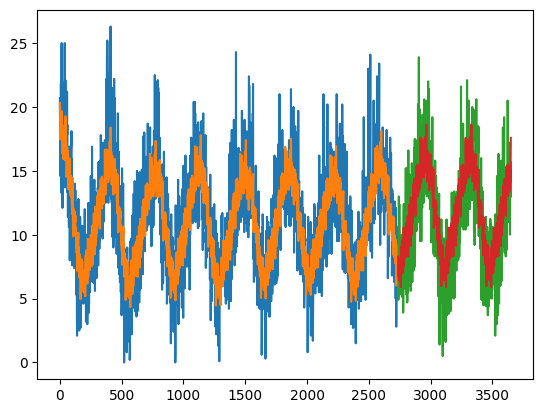

In [4]:
divisor = int(df_temperatures.shape[0]*0.75)
end = df_temperatures.shape[0] - 1

train_series = df_temperatures.values[:divisor]
test_series = df_temperatures.values[divisor:]

model = ExponentialSmoothing(endog=train_series,
                             trend='add',
                             damped_trend=True,
                             seasonal='add',
                             seasonal_periods=365)

model_fit = model.fit(smoothing_level = 0.01)

yhat = model_fit.predict(divisor,end)

plt.plot(train_series)
plt.plot(np.arange(0,divisor), model_fit.fittedvalues)
plt.plot(np.arange(divisor,end+1), test_series)
plt.plot(np.arange(divisor,end+1), yhat)
plt.show()

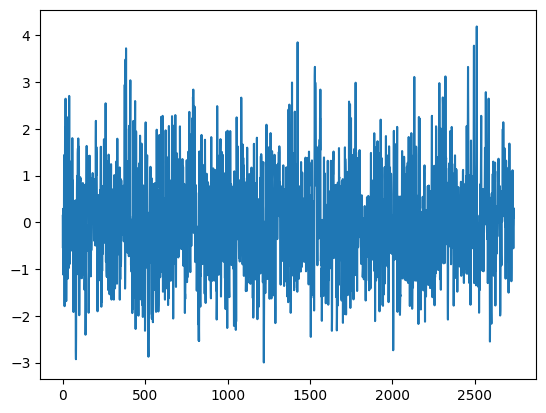

In [5]:
mean = np.mean(model_fit.resid)
std_dev = np.std(model_fit.resid)
normalized_residuals = (model_fit.resid - mean) / std_dev
plt.plot(normalized_residuals)

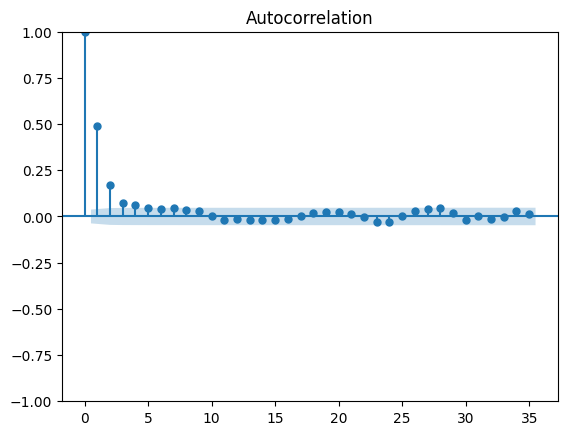

In [6]:
plot_acf(model_fit.resid)
plt.show()

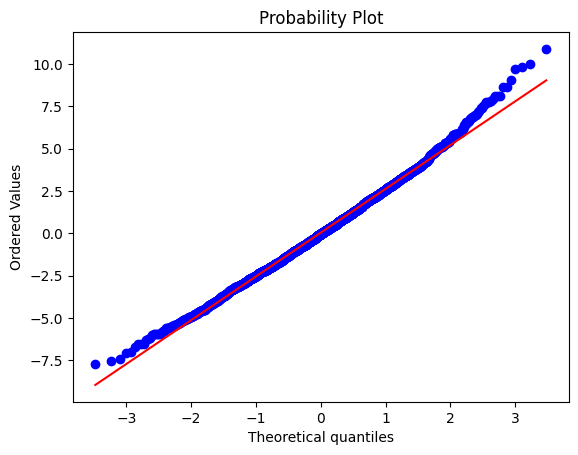

In [7]:
stats.probplot(model_fit.resid, dist="norm", plot=pylab)
pylab.show()

# ARIMA

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Exemplo 1

--2024-09-22 21:57:51--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-shampoo-sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘monthly-shampoo-sales.csv.4’

monthly-shampoo-sal 100%[===================>]     519  --.-KB/s    in 0s      

2024-09-22 21:57:51 (19.4 MB/s) - ‘monthly-shampoo-sales.csv.4’ saved [519/519]



<Axes: xlabel='Month'>

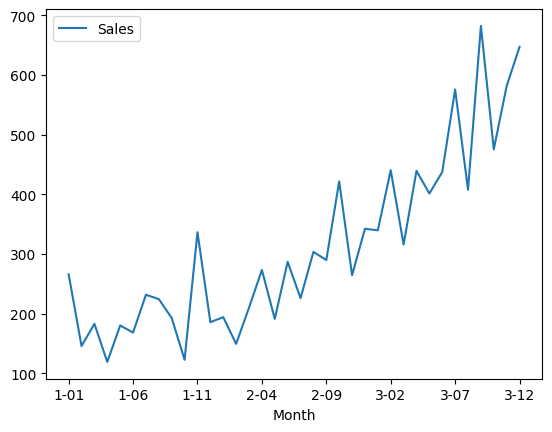

In [9]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-shampoo-sales.csv
df_shampoo = pd.read_csv('monthly-shampoo-sales.csv', header=0, index_col=0)
df_shampoo.plot()

In [10]:
divisor = int(df_shampoo.shape[0]*0.75)
end = df_shampoo.shape[0] - 1

train_series = df_shampoo.values[:divisor]
test_series = df_shampoo.values[divisor:]

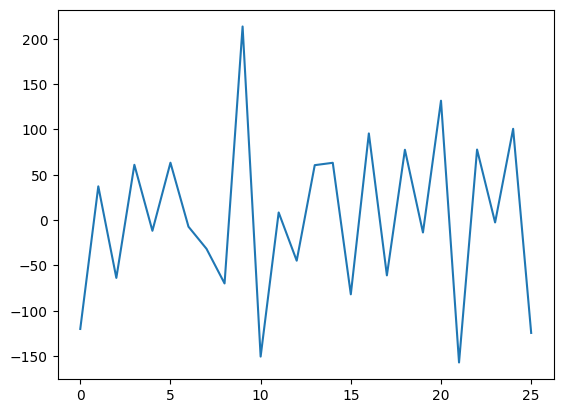

In [11]:
plt.plot(diff(train_series))

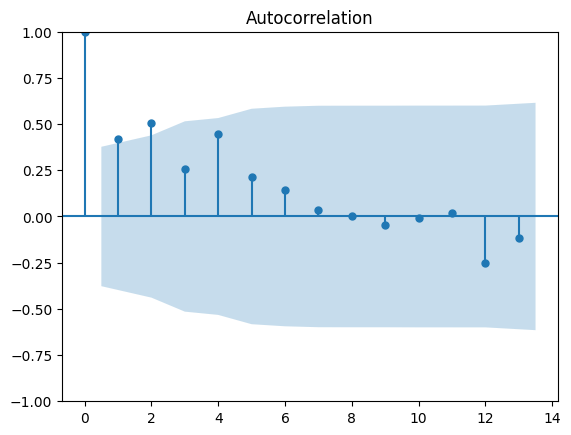

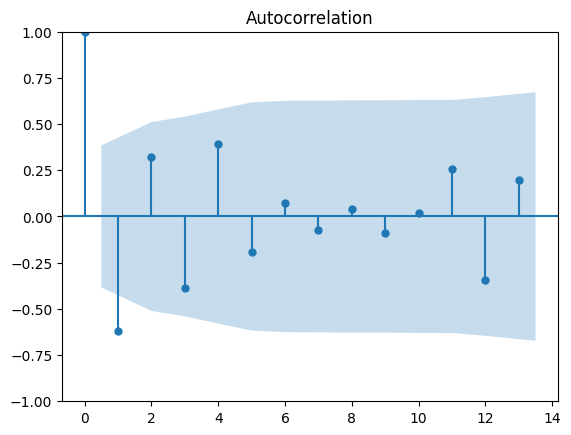

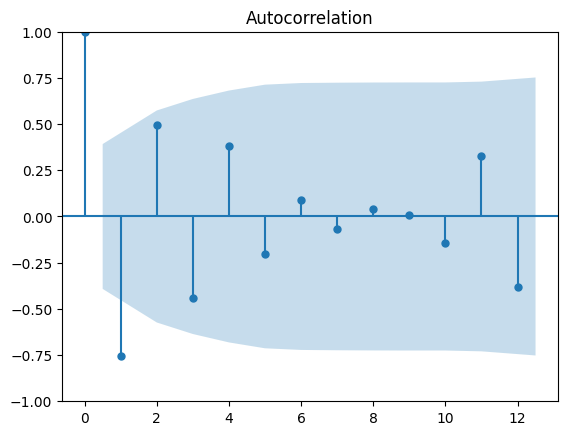

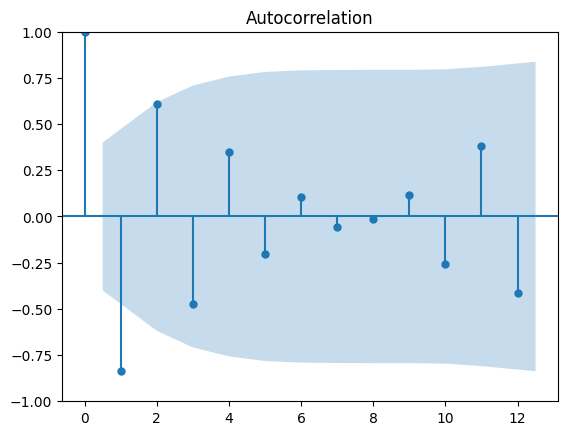

In [12]:
plot_acf(train_series)
plot_acf(diff(train_series))
plot_acf(diff(diff(train_series)))
plot_acf(diff(diff(diff(train_series))))
plt.show()

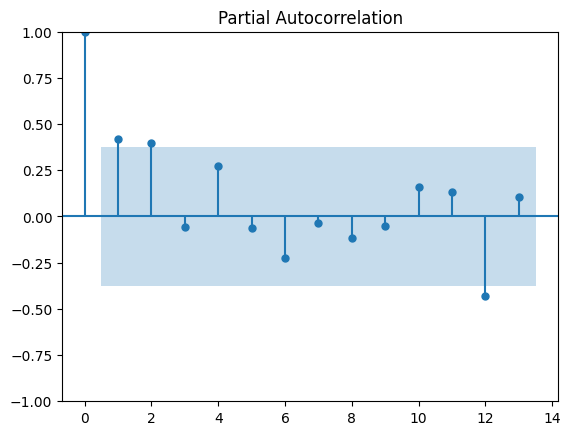

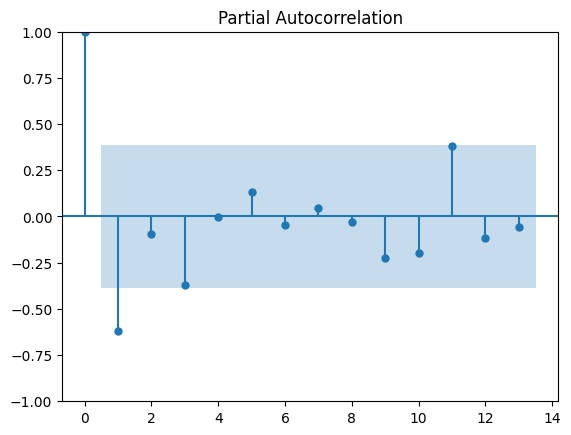

In [13]:
plot_pacf(train_series)
plot_pacf(diff(train_series))
plt.show()

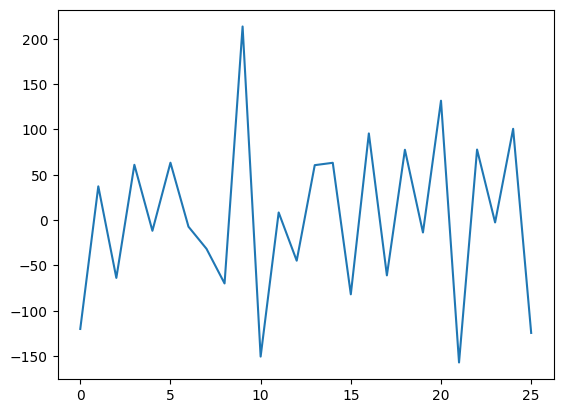

In [14]:
plt.plot(diff(train_series))

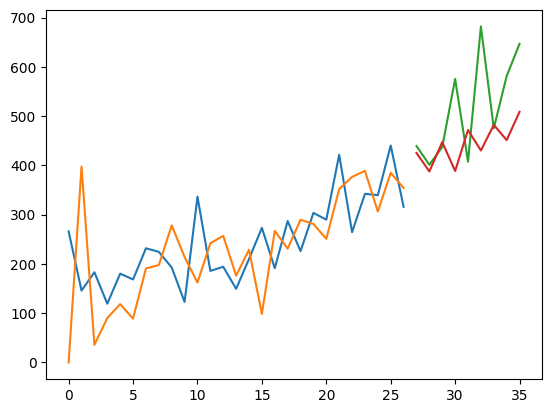

In [15]:
model = SARIMAX(train_series.squeeze(), order=(3, 2, 0))

model_fit = model.fit()

yhat = model_fit.predict(divisor,end)

plt.plot(train_series)
plt.plot(np.arange(0,divisor), model_fit.fittedvalues)
plt.plot(np.arange(divisor,end+1), test_series)
plt.plot(np.arange(divisor,end+1), yhat)
plt.show()

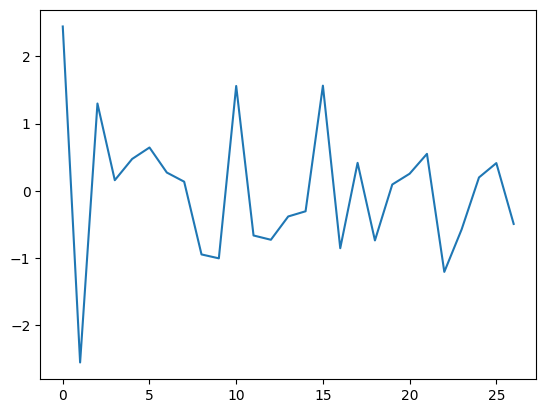

In [16]:
mean = np.mean(model_fit.resid)
std_dev = np.std(model_fit.resid)
normalized_residuals = (model_fit.resid - mean) / std_dev
plt.plot(normalized_residuals)

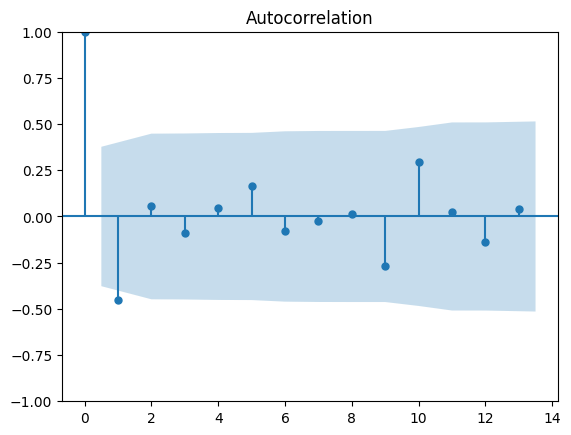

In [17]:
plot_acf(model_fit.resid)
plt.show()

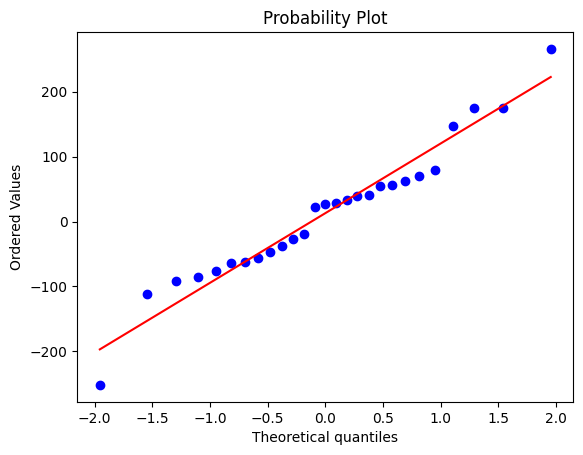

In [18]:
stats.probplot(model_fit.resid, dist="norm", plot=pylab)
pylab.show()

## Exemplo 2

--2024-09-22 21:58:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1633 (1.6K) [text/plain]
Saving to: ‘monthly-robberies.csv.4’

monthly-robberies.c 100%[===================>]   1.59K  --.-KB/s    in 0s      

2024-09-22 21:58:02 (18.9 MB/s) - ‘monthly-robberies.csv.4’ saved [1633/1633]



<Axes: xlabel='Month'>

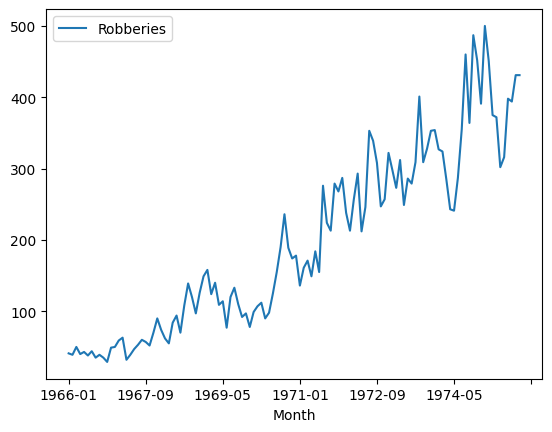

In [19]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv
df_robberies = pd.read_csv('monthly-robberies.csv', header=0, index_col=0)
df_robberies.plot()

In [20]:
divisor = int(df_robberies.shape[0]*0.8)
end = df_robberies.shape[0] - 1

train_series = df_robberies.values[:divisor]
test_series = df_robberies.values[divisor:]

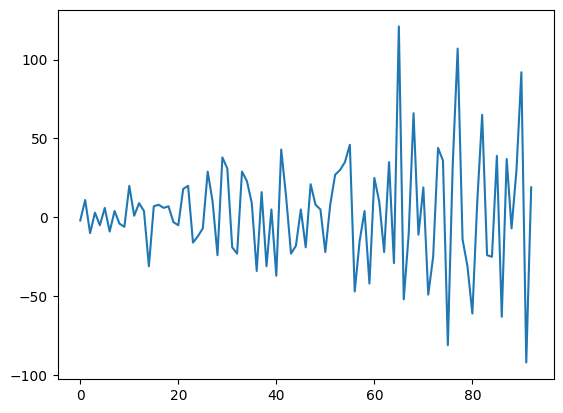

In [21]:
plt.plot(diff(train_series))

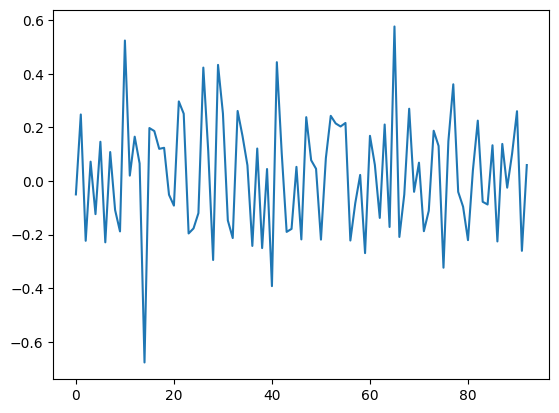

In [22]:
plt.plot(diff(list(map(np.log, train_series))))

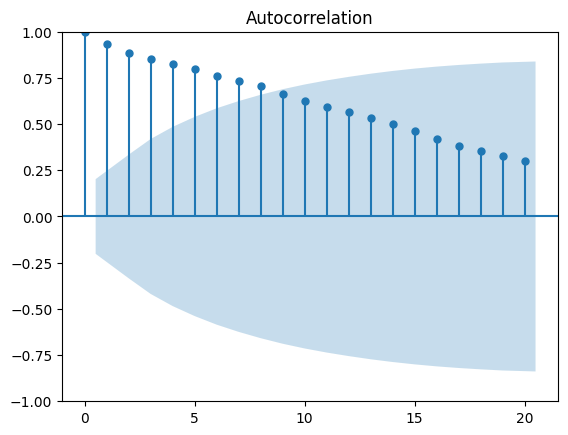

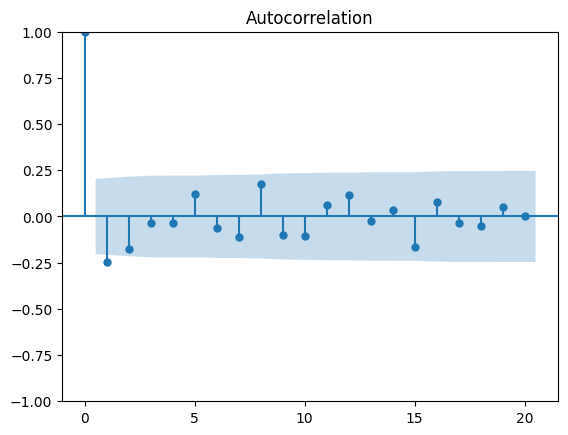

In [23]:
plot_acf(np.array(list(map(np.log, train_series))))
plot_acf(diff(list(map(np.log, train_series))))
plt.show()

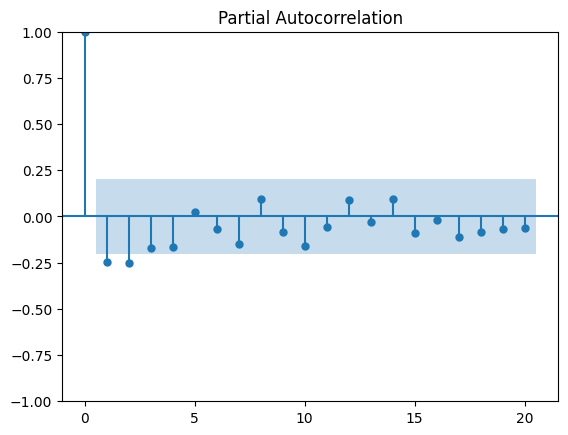

In [24]:
plot_pacf(diff(list(map(np.log, train_series))))
plt.show()

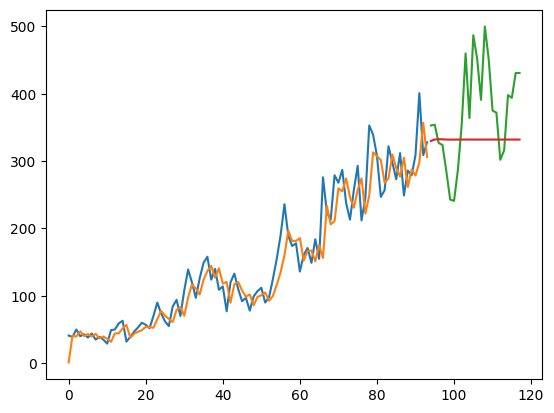

In [25]:
model = SARIMAX(list(map(np.log, train_series)), order=(2, 1, 2))

model_fit = model.fit()

yhat = model_fit.predict(divisor,end)

plt.plot(train_series)
plt.plot(np.arange(0,divisor), list(map(np.exp, model_fit.fittedvalues)))
plt.plot(np.arange(divisor,end+1), test_series)
plt.plot(np.arange(divisor,end+1), list(map(np.exp, yhat)))
plt.show()

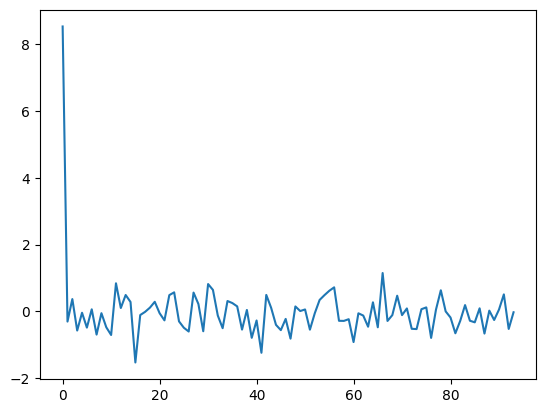

In [26]:
mean = np.mean(model_fit.resid)
std_dev = np.std(model_fit.resid)
normalized_residuals = (model_fit.resid - mean) / std_dev
plt.plot(normalized_residuals)

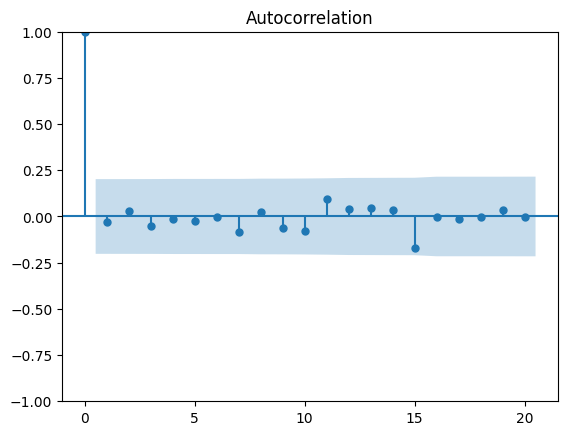

In [27]:
plot_acf(model_fit.resid)
plt.show()

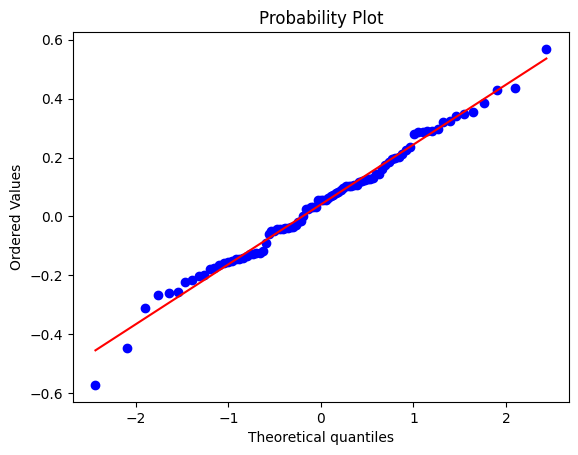

In [28]:
import scipy.stats as stats
import pylab
stats.probplot(model_fit.resid[1:], dist="norm", plot=pylab)
pylab.show()